In [34]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.discriminant_analysis import StandardScaler
import matplotlib.pyplot as plt


      Medicine  Age  Weight  Health_Rate_Before  Health_Rate_After  \
0      Aspirin   12      29                  70                 80   
1    Ibuprofen   15      40                  65                 75   
2  Paracetamol   18      60                  50                 65   
3      Aspirin   20      80                  85                 90   
4  Cough Syrup   22      40                  60                 75   
5  Paracetamol   24      35                  55                 70   
6    Ibuprofen   26      82                  45                 60   
7  Cough Syrup   30      49                  70                 80   
8      Aspirin   40      65                  90                 95   

  Side_Effects  
0         None  
1    Dizziness  
2         None  
3       Nausea  
4   Drowsiness  
5         None  
6     Headache  
7         None  
8         None  


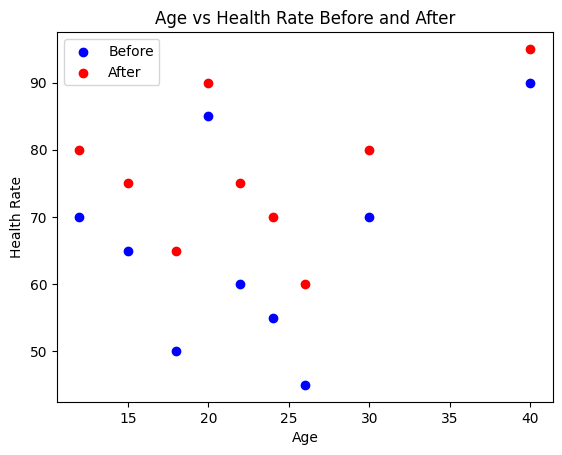

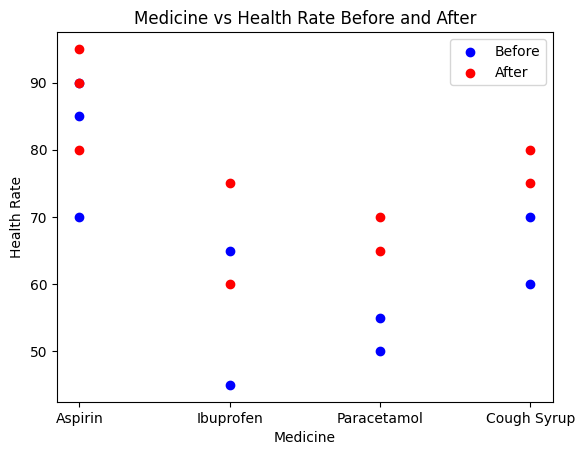

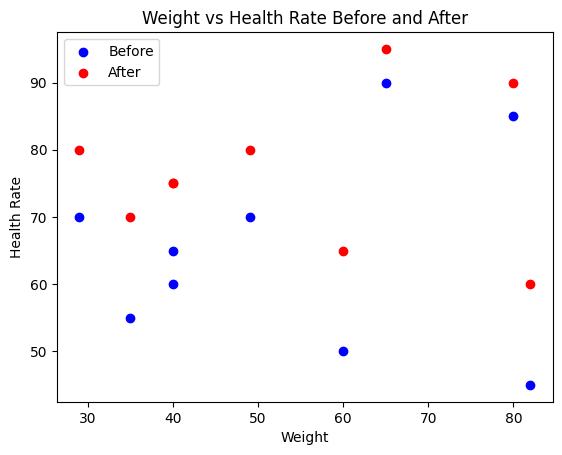

In [35]:
data = {
    "Medicine": ["Aspirin", "Ibuprofen", "Paracetamol", "Aspirin", "Cough Syrup", 
                 "Paracetamol", "Ibuprofen", "Cough Syrup", "Aspirin"],
    "Age": [12, 15, 18, 20, 22, 24, 26, 30, 40],
    "Weight": [29, 40, 60, 80, 40, 35, 82, 49, 65],
    "Health_Rate_Before": [70, 65, 50, 85, 60, 55, 45, 70, 90],
    "Health_Rate_After": [80, 75, 65, 90, 75, 70, 60, 80, 95],
    "Side_Effects": ["None", "Dizziness", "None", "Nausea", "Drowsiness", 
                     "None", "Headache", "None", "None"]
}

df = pd.DataFrame(data)

print(df)


plt.scatter(df["Age"], df["Health_Rate_Before"], color="blue", label="Before")
plt.scatter(df["Age"], df["Health_Rate_After"], color="red", label="After")

plt.title("Age vs Health Rate Before and After")
plt.xlabel("Age")
plt.ylabel("Health Rate")
plt.legend()
plt.show()


plt.scatter(df["Medicine"], df["Health_Rate_Before"], color="blue", label="Before")
plt.scatter(df["Medicine"], df["Health_Rate_After"], color="red", label="After")

plt.title("Medicine vs Health Rate Before and After")
plt.xlabel("Medicine")
plt.ylabel("Health Rate")
plt.legend()
plt.show()


plt.scatter(df["Weight"], df["Health_Rate_Before"], color="blue", label="Before")
plt.scatter(df["Weight"], df["Health_Rate_After"], color="red", label="After")

plt.title("Weight vs Health Rate Before and After")
plt.xlabel("Weight")
plt.ylabel("Health Rate")
plt.legend()
plt.show()


In [ ]:
X = df[["Medicine", "Age", "Weight", "Health_Rate_Before"]]
Y = df[["Health_Rate_After", "Side_Effects"]]

yColumn_transformer = ColumnTransformer(
 transformers=[
    ("encoder", OneHotEncoder(), ["Side_Effects"])
 ]
)

xColumn_transformer = ColumnTransformer(
 transformers=[
    ("encoder", OneHotEncoder(), ["Medicine"])
 ]
)

X = xColumn_transformer.fit_transform(X)
y_encoded = yColumn_transformer.fit_transform(Y[["Side_Effects"]]).toarray() 
y_continuous = Y[["Health_Rate_After"]].values 

Y_combined = np.hstack([y_continuous, y_encoded])


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (9, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 2)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 1)	1.0
  (8, 0)	1.0


In [37]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_combined, test_size=0.2, random_state=42)


In [38]:
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Mean Squared Error: 21.17
R^2 Score: -3.50


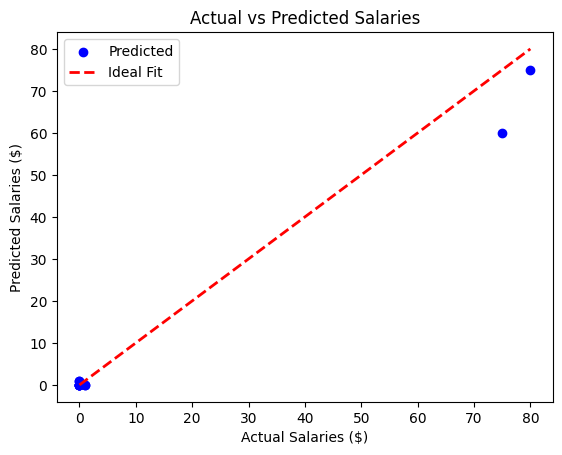

In [43]:
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.scatter(Y_test, y_pred, color='blue', label="Predicted")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.title("Actual vs Predicted Salaries")
plt.xlabel("Actual Salaries ($)")
plt.ylabel("Predicted Salaries ($)")
plt.legend()
plt.show()


In [50]:

# Define function for user input prediction
def predict_health_rate_and_effect(medicine, age, weight, health_rate_before):
    # Create a DataFrame for the input data with proper column names
    input_data = pd.DataFrame([[medicine, age, weight, health_rate_before]], 
                              columns=["Medicine", "Age", "Weight", "Health_Rate_Before"])
    
    # One-hot encode the input (similar to the training data)
    input_data_transformed = xColumn_transformer.transform(input_data)
    
    # Standardize the input features
    input_data_scaled = scaler.transform(input_data_transformed)
    
    # Predict Health_Rate_After and Side_Effects
    prediction = model.predict(input_data_scaled)
    
    # Extract predictions
    predicted_health_rate_after = prediction[0, 0]
    predicted_side_effects_encoded = prediction[0, 1:]
    
    # Decode the side effects prediction
    side_effects_labels = yColumn_transformer.transformers_[0][1].categories_[0]
    predicted_side_effect = side_effects_labels[np.argmax(predicted_side_effects_encoded)]
    
    # Print the results
    print(f"Predicted Health Rate Before: {health_rate_before}")
    print(f"Predicted Health Rate After: {predicted_health_rate_after:.2f}")
    print(f"Predicted Side Effect: {predicted_side_effect}")

# Test the prediction with user input
medicine = "Aspirin"
age = 15
weight = 49
health_rate_before = 64

predict_health_rate_and_effect(medicine, age, weight, health_rate_before)


Predicted Health Rate Before: 64
Predicted Health Rate After: 88.33
Predicted Side Effect: None
